## Business Problem:

We have a Health Company data also which is at any given point of time, has around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. 

The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
- A sizeable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time to fit themselves to the company

Hence, the management wants to understand what factors they should focus on, in order to curb attrition and how the employement numbers will impact them in 2020.  
In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.


In [45]:
### Import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [46]:
### Read the dataset
df1=pd.read_excel('../data/Case Study_Attrition.xlsx', sheet_name="4")
df2=pd.read_excel('../data/Case Study_Attrition.xlsx', sheet_name="5")
df3=pd.read_excel('../data/Case Study_Attrition.xlsx', sheet_name="6")

In [47]:
## Get the size of dataframes
df1.shape, df2.shape, df3.shape

((4410, 24), (4410, 3), (4410, 4))

In [48]:
## Combine the dataframe into final dataframe
from functools import reduce
dfs = [df1, df2, df3]
df = reduce(lambda left,right: pd.merge(left,right,on='EmployeeID'), dfs)

In [49]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0


### Feature Engineering

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [51]:
### Separating Categorical and Numerical variable
df_cat_cols=df.select_dtypes(exclude=['float_','number','bool_'])
df_num_cols=df.select_dtypes(exclude=['object','bool_'])

In [52]:
df_num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


### Observations:

EmployeeCount and StandardHours shows 0 std and hence, not useful for prediction.

In [53]:
df_cat_cols.describe().T

,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410


### Observation:

Over18 only have one value which is "Y" and hence, not useful for prediction

In [54]:
### Dropping unwanted columns

df.drop(['EmployeeID','EmployeeCount','StandardHours', 'Over18'], axis=1, inplace=True)
df_num_cols.drop(['EmployeeID','EmployeeCount','StandardHours'], axis=1, inplace=True)
df_cat_cols.drop(['Attrition','Over18'], axis=1, inplace=True)

## EDA

In [55]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0


percentage of NO attrition is 83.88%
percentage of YES attrition is 16.12%


<Figure size 432x360 with 0 Axes>

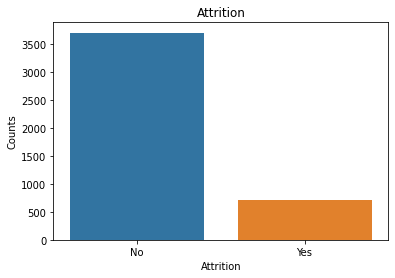

<Figure size 432x360 with 0 Axes>

In [56]:
# Get Class Percentage distribution
def GetCountsOfClassess(df, target): 
    count_no_sub = len(df[df[target]=='No'])
    count_sub = len(df[df[target]=='Yes'])
    pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
    print("percentage of NO attrition is {}%".format(round(pct_of_no_sub*100,2)))
    pct_of_sub = count_sub/(count_no_sub+count_sub)
    print("percentage of YES attrition is {}%".format(round(pct_of_sub*100,2)))


GetCountsOfClassess(df, 'Attrition')

# Plot target class counts
sns.countplot('Attrition', data=df)
plt.title('Attrition')
plt.xlabel('Attrition')
plt.ylabel('Counts')
plt.figure(figsize=(6, 5))

### Visualize Numerical variables

In [57]:
attrition_yes=df[df['Attrition'] == 'Yes']
attrition_no=df[df['Attrition'] != 'Yes']

def histogram(column) : 
    
    trace1 = go.Histogram(x  = attrition_yes[column],
                          histnorm= "percent",
                          name = "Attrition - Yes",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = attrition_no[column],
                          histnorm = "percent",
                          name = "Attrition - No",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace2, trace1]
    layout = go.Layout(dict(title =column + " distribution in Employee attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)


num_cols = ['Age','TotalWorkingYears', 'MonthlyIncome']

### for all Numerical columns plot histogram    
for i in df_num_cols :
    histogram(i)    

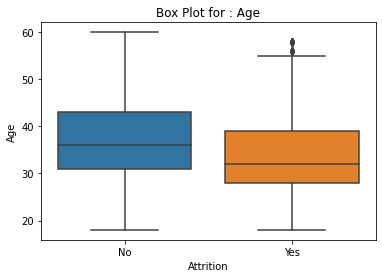

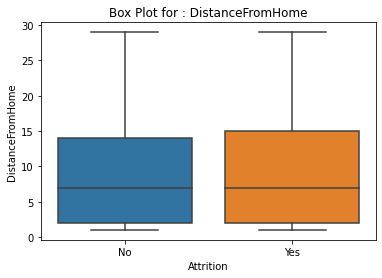

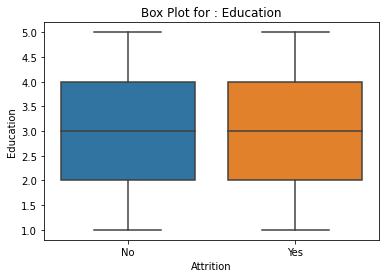

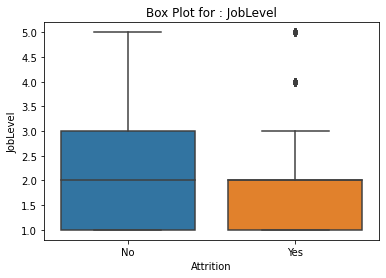

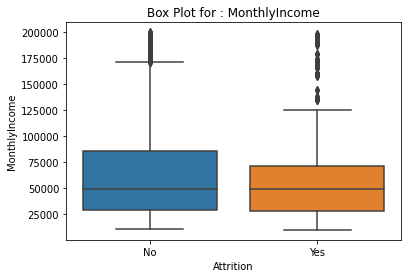

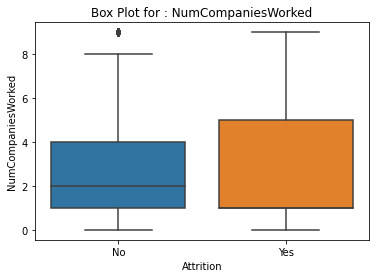

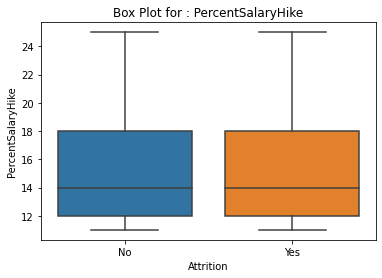

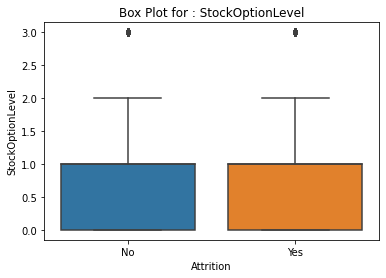

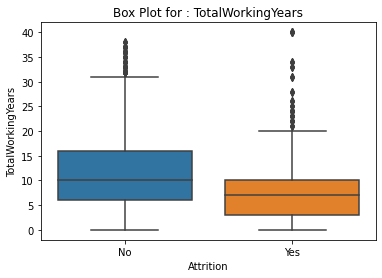

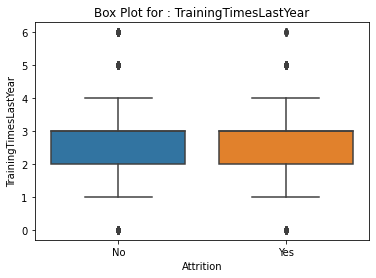

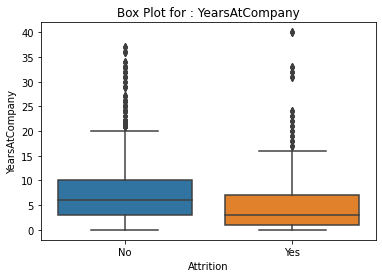

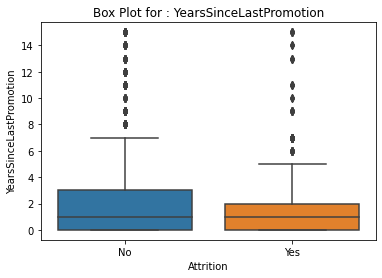

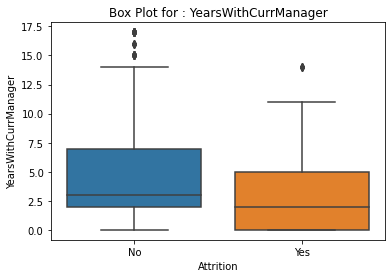

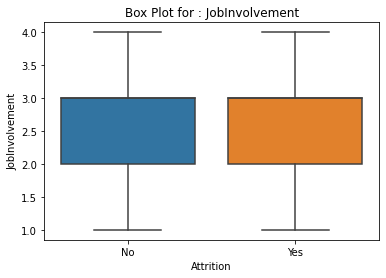

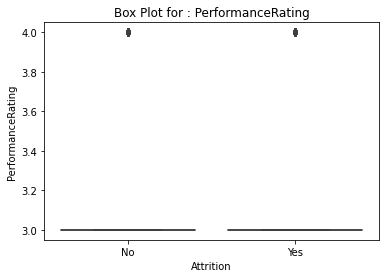

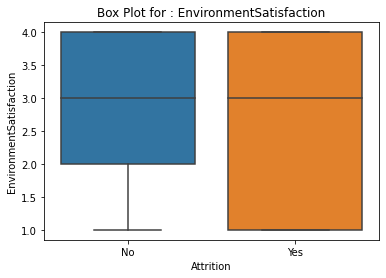

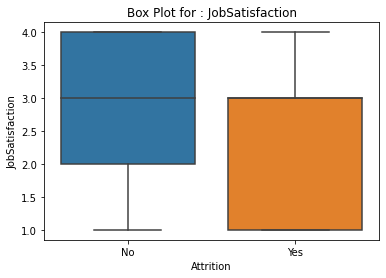

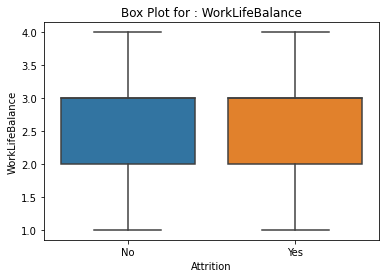

In [14]:
df_box=pd.concat([df_num_cols, df['Attrition']], axis=1)

box_lst=[ x for x in df_box.columns if x not in ('Attrition')]

for col in box_lst: 
    sns.boxplot(x='Attrition', y=col, data=df_box)
    plt.title("Box Plot for : " + col)
    plt.show()

### Visualize Categorical variables

In [58]:
attrition_yes=df[df['Attrition'] == 'Yes']
attrition_no=df[df['Attrition'] != 'Yes']

def bar_plot(column): 
    
    tg_ch  =  attrition_yes[column].value_counts().reset_index()
    tg_ch.columns  = [column,"count"]
    tg_nch =  attrition_no[column].value_counts().reset_index()
    tg_nch.columns = [column,"count"]

    #bar - churn
    trace1 = go.Bar(x = tg_ch[column]  , y = tg_ch["count"],
                    name = "Attrition - Yes",
                    marker = dict(line = dict(width = .5,color = "black")),
                    opacity = .9)

    #bar - not churn
    trace2 = go.Bar(x = tg_nch[column] , y = tg_nch["count"],
                    name = "Attrition - No",
                    marker = dict(line = dict(width = .5,color = "black")),
                    opacity = .9)

    layout = go.Layout(dict(title = "Employee attrition in " + column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "count",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    data = [trace2, trace1]
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)

for cat_column in df_cat_cols: 
    bar_plot(cat_column)

In [59]:
# Define Class1 and Class2 Dataframe
attrition_yes=df[df['Attrition'] == 'Yes']
attrition_no=df[df['Attrition'] != 'Yes']


def plot_pie(column, class1_dataFrame, class2_dataFrame, class1_name, class2_name) :
    
    
    trace1 = go.Pie(values  = class1_dataFrame[column].value_counts().values.tolist(),
                    labels  = class1_dataFrame[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = class1_name,
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = class2_dataFrame[column].value_counts().values.tolist(),
                    labels  = class2_dataFrame[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = class2_name
                   )


    layout = go.Layout(dict(title = column + " distribution in Employee Attrition ",  # Update title
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = class1_name,
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = class2_name,
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
#for all categorical columns plot pie

class1_dataFrame=attrition_no   # Put Class 1 dataframe
class2_dataFrame=attrition_yes  # Put Class 2 dataframe
class1_name='Attrition - No'  # Put Class 1 Name
class2_name='Attrition - Yes'  # Put Class 2 Name

for i in df_cat_cols:
    plot_pie(i,class1_dataFrame, class2_dataFrame, class1_name, class2_name) 

In [17]:
plt.figure(figsize=(20, 5))

def plot_stacked_bar(table, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False, title=False, x_label=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    table           -- Cross table
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    data = table.div(table.sum(1).astype(float), axis=0).values.T.tolist()
    category_labels = table.div(table.sum(1).astype(float), axis=0).index.tolist()
    
    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)
    
    data = np.array(data)
    
    plt.rc('axes', axisbelow=True)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color, width = 0.4))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)
        
    if x_label:
        plt.xlabel(x_label)

    plt.legend(loc='lower center')

    if grid:
        plt.grid(axis='y', linestyle='-')
        
        
    if title: 
        plt.title(title)

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, value_format.format(h), ha="center", va="center")

<Figure size 1440x360 with 0 Axes>

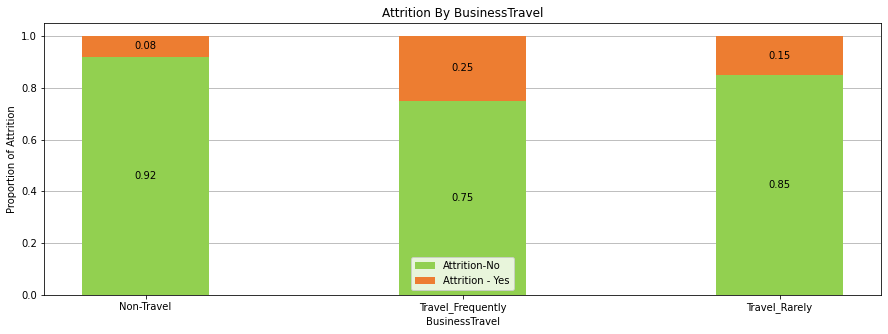

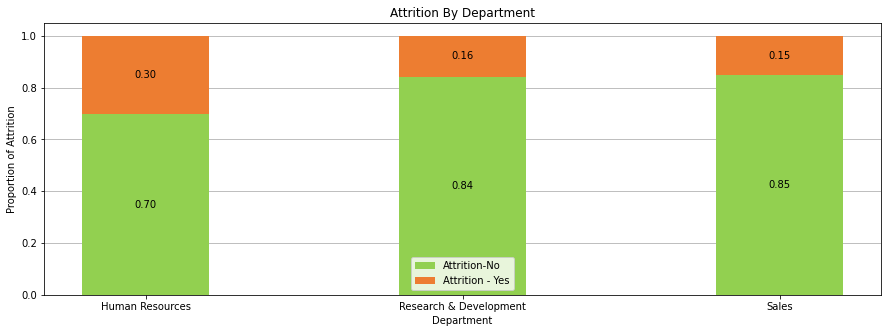

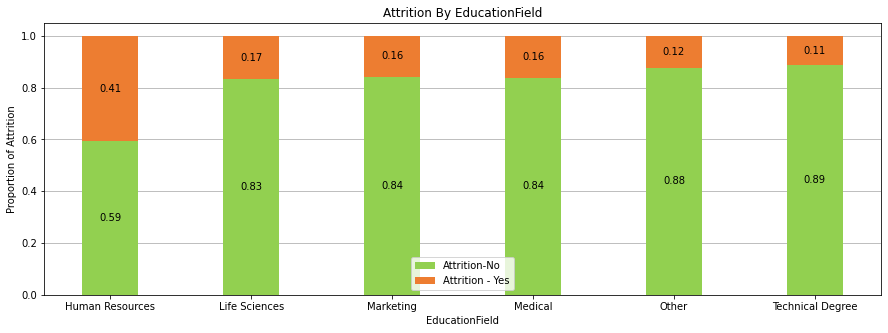

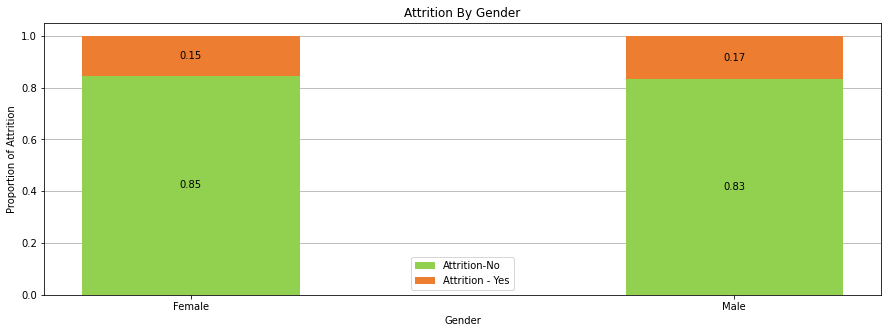

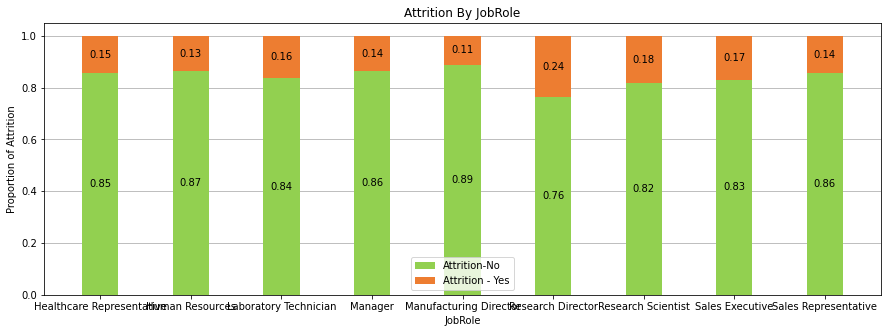

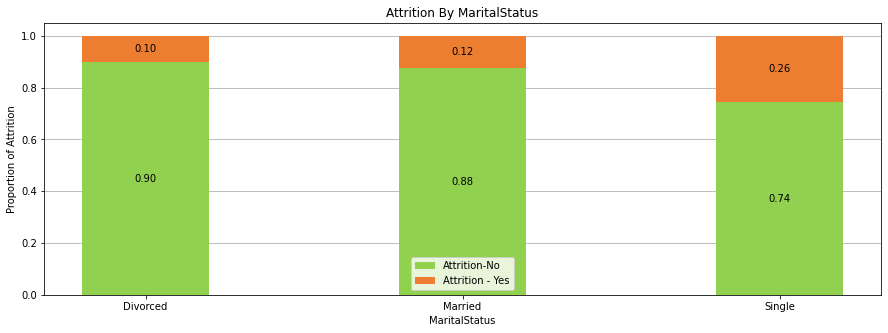

In [18]:
series_labels = ["Attrition-No", "Attrition - Yes"]

for i in df_cat_cols:    
    
    table=pd.crosstab(df[i],df.Attrition)
    plt.figure(figsize=(15, 5))

    plot_stacked_bar(
        table, 
        series_labels, 
        show_values=True, 
        value_format="{:.2f}",
        colors=['#92D050', '#ED7D31'],
        y_label="Proportion of Attrition",
        title='Attrition By ' + i,
        x_label=i
    )
    

    plt.show()

### Bivariate Analysis

### Avg Monthly Income By features

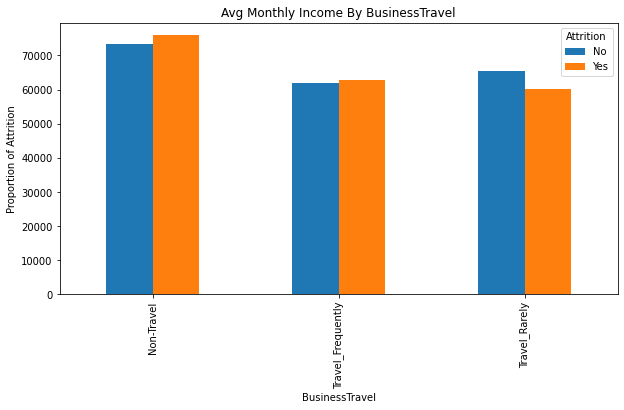

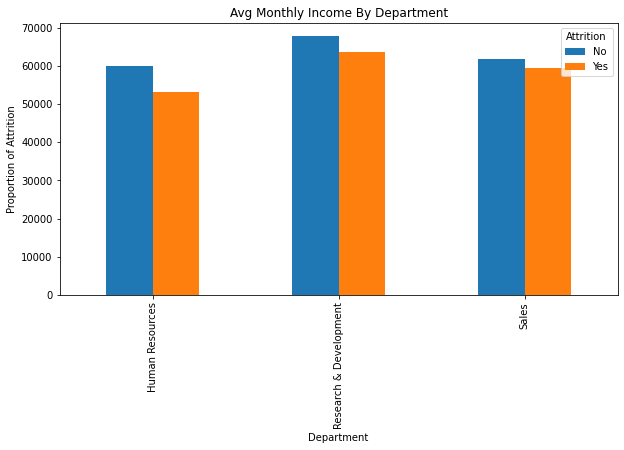

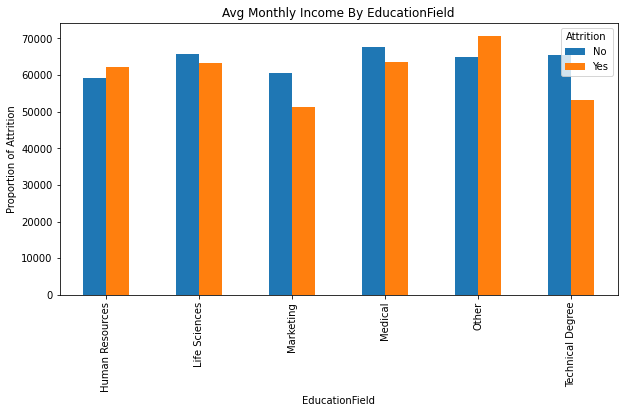

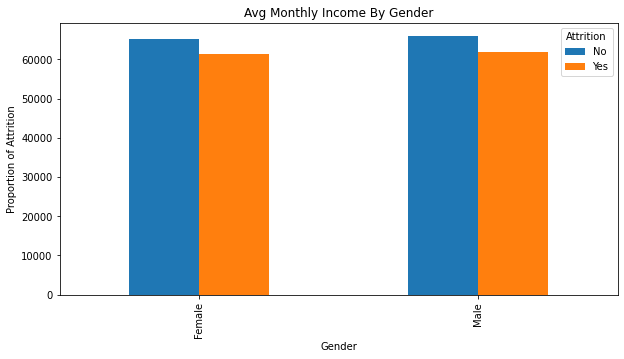

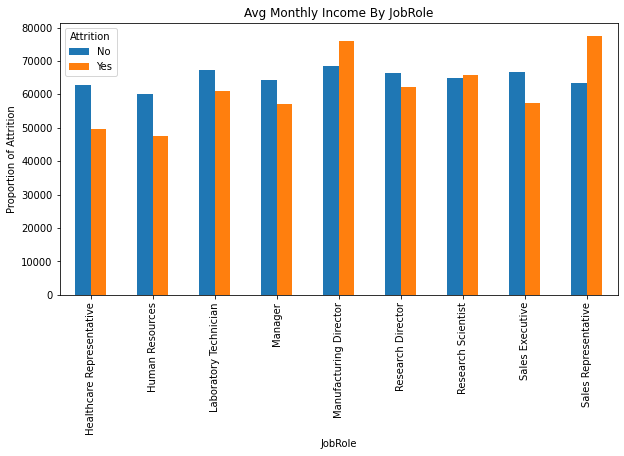

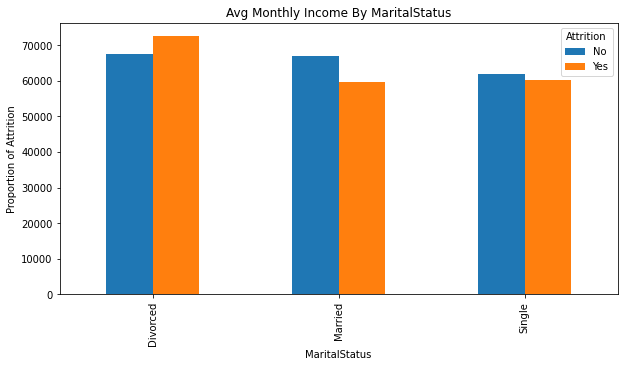

In [19]:
for i in df_cat_cols: 
    
    fig = df.groupby([i, 'Attrition'])['MonthlyIncome'].mean().unstack().plot(kind='bar',figsize=(10, 5), linewidth=2)
    plt.ylabel("Proportion of Attrition")
    plt.title('Avg Monthly Income By ' + i)
    plt.xlabel(i)

### Avg Age By Features

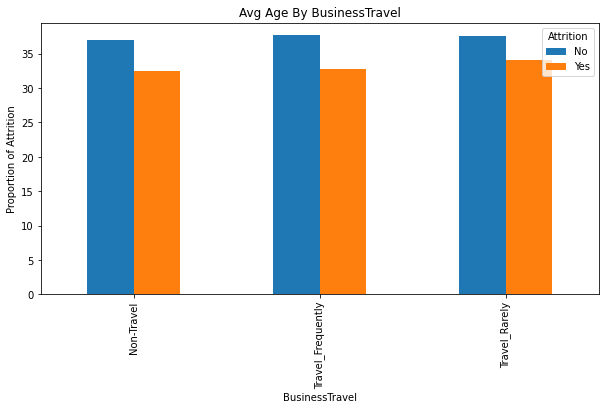

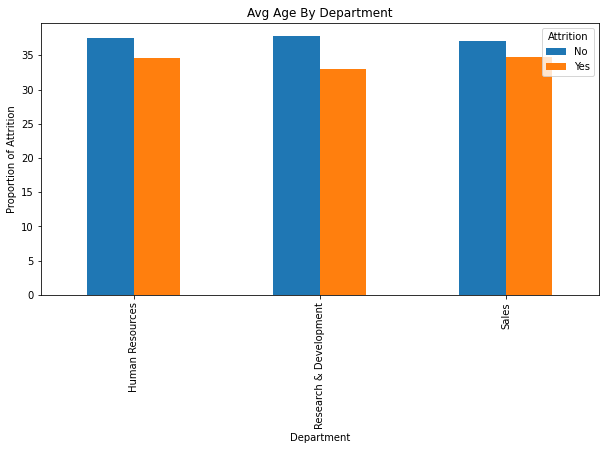

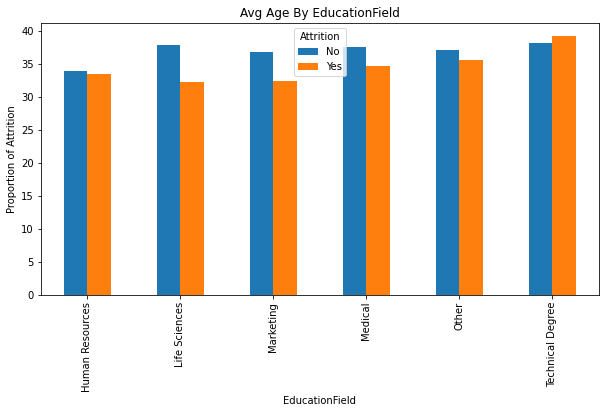

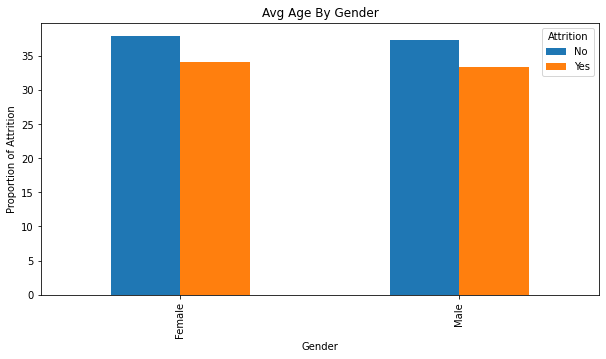

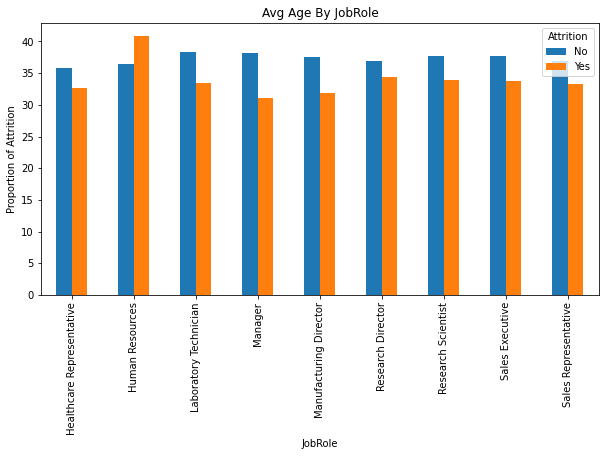

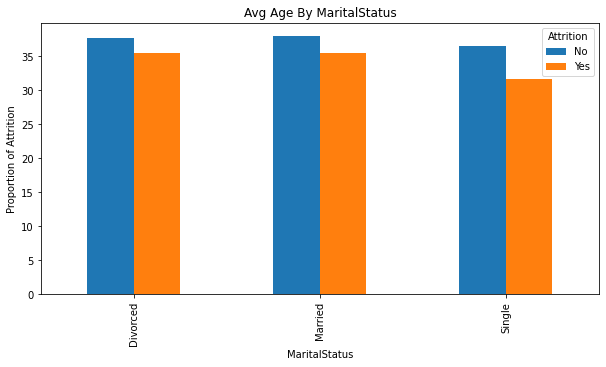

In [20]:
for i in df_cat_cols: 
    
    fig = df.groupby([i, 'Attrition'])['Age'].mean().unstack().plot(kind='bar',figsize=(10, 5), linewidth=2)
    plt.ylabel("Proportion of Attrition")
    plt.title('Avg Age By ' + i)
    plt.xlabel(i)

### Avg Distance From Home By Features

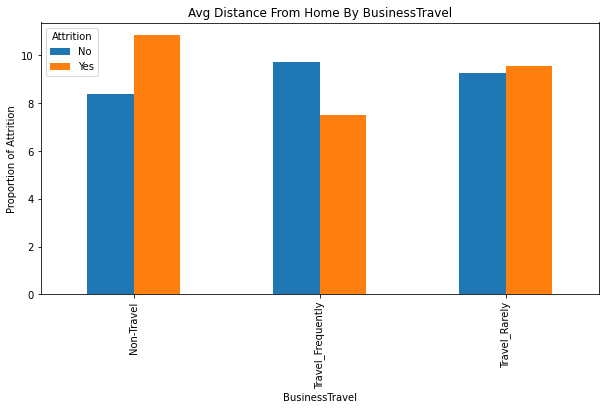

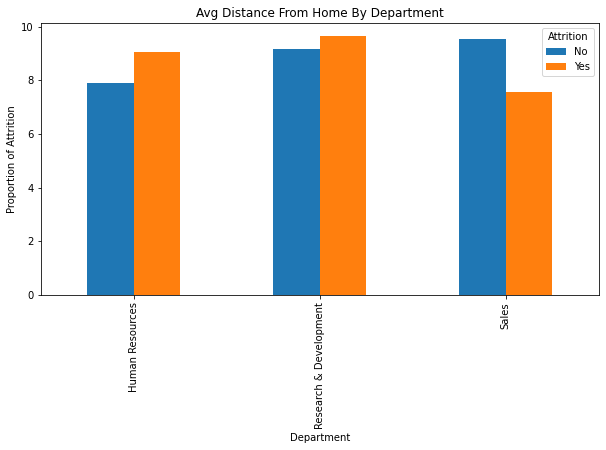

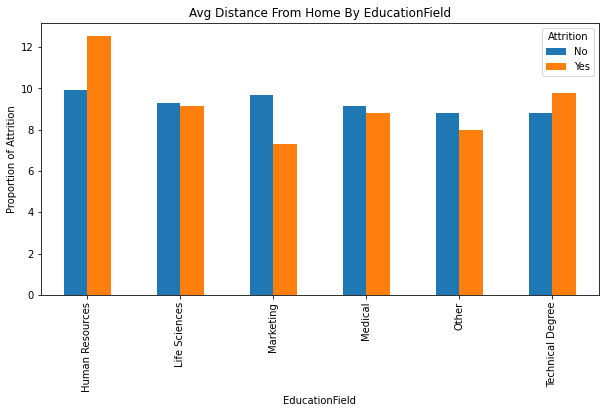

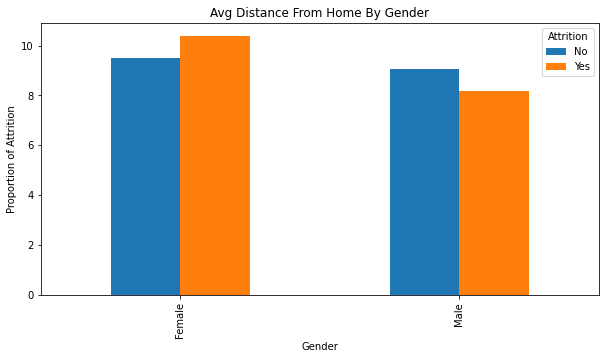

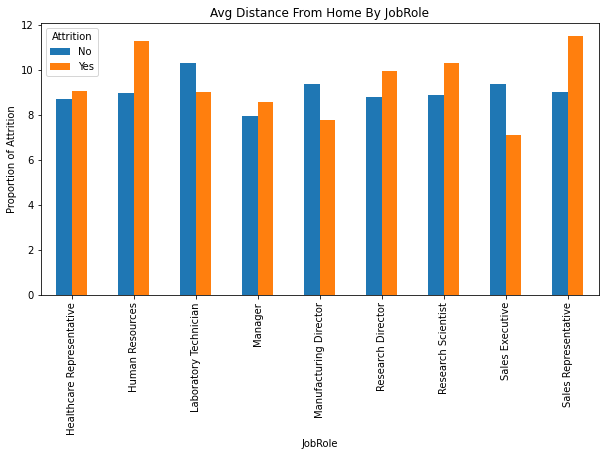

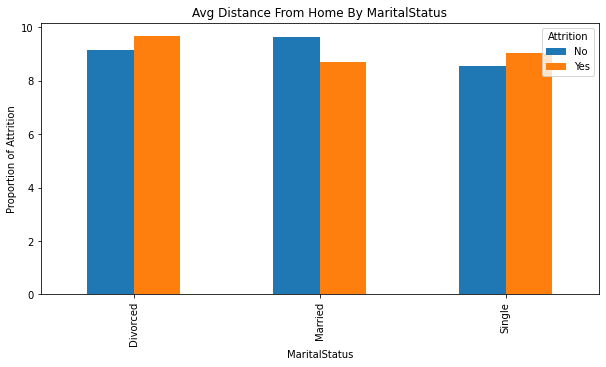

In [21]:
for i in df_cat_cols: 
    
    fig = df.groupby([i, 'Attrition'])['DistanceFromHome'].mean().unstack().plot(kind='bar',figsize=(10, 5), linewidth=2)
    plt.ylabel("Proportion of Attrition")
    plt.title('Avg Distance From Home By ' + i)
    plt.xlabel(i)

### Identifying and Handling Missing data

In [22]:
#### Checking the missing data

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

### Statistical Tests for checking Significance 

### Correlation Matrix with Heatmap

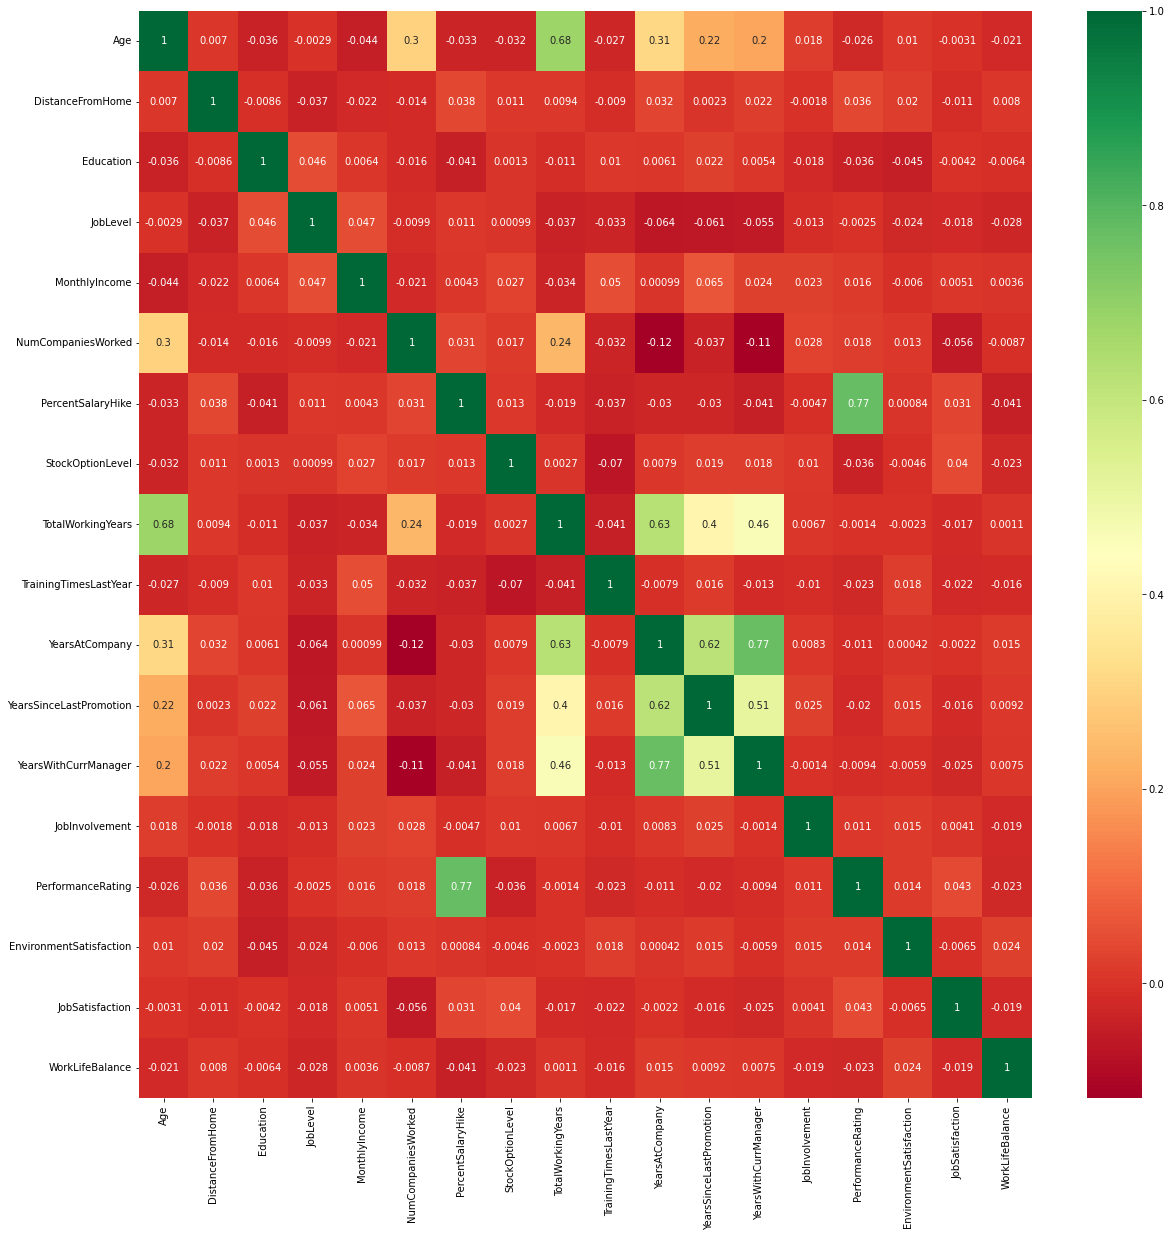

In [23]:
#get correlations of each features in dataset

df_corr=pd.concat([df_num_cols, df['Attrition']], axis=1)

corrmat = df_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Observation:

The following features are correlated with target -
- Age
- TotalWorkingYears
- YearsAtCompany
- YearsWithCurrentManager
- EnviornmentSatisfaction
- JobSatisfaction

### Statistical Test for Categorical variables

In [24]:
import researchpy as rp
# Function to perform Chi Squared Test
def chi_square_test(cat1, cat2):
    # Import Libraries
    import pandas as pd
    import scipy.stats as stats
    
    print("==========================================================================================")
    print('\nChi Square Test Summary:')
    dataset_table=pd.crosstab(cat1,cat2)
    print('Dataset Table: \n', dataset_table)
    
    Observed_Values=dataset_table.values
    print('\nObserved_Values: \n', Observed_Values)
    
    val=stats.chi2_contingency(dataset_table)
    Expected_Values=val[3]
    print('\nExpected_Values: \n', Expected_Values)
    
    no_of_rows=len(dataset_table.iloc[:,0])
    no_of_columns=len(dataset_table.iloc[0,:])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    alpha=0.05
    
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("\nchi-square statistic:",chi_square_statistic)
    
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    print('\ncritical_value:',critical_value)
    
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    print('\np-value:',p_value)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',ddof)

    
    print('\nFinal Chi Square Test Result: ')
    cat1_name=cat1.name
    cat2_name=cat2.name
    if chi_square_statistic>=critical_value:
        print('1. Using Chi Square Statistic method:')
        print("Reject H0,There is a relationship between {} and {} categorical variables".format(cat1_name,cat2_name))
    else:
        print('1. Using Chi Square Statistic method:')
        print("Retain H0,There is no relationship between {} and {} categorical variables".format(cat1_name,cat2_name))
    
    if p_value<=alpha:
        print('2. Using P-Value method:')
        print("Reject H0,There is a relationship between {} and {} categorical variables".format(cat1_name,cat2_name))
    else:
        print('2. Using P-Value method:')
        print("Retain H0,There is no relationship between {} and {} categorical variables".format(cat1_name,cat2_name))  

        
def chi_square_test_with_researchpy(cat1, cat2):
    
    crosstab, test_results, expected = rp.crosstab(cat1, cat2,
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    
    
    
    print("\n")
    print("Chi-Square Test using researchpy")
    print("Test Summary:")
    print(test_results)
    print("")
    
    col1=cat1.name
    col2=cat2.name

    if test_results.iloc[2,1] > 0.25:
        print("Measure of the strength of relationship betweeen {} and {} is : Very Strong".format(col1, col2))
    elif test_results.iloc[2,1] > 0.15:
        print("Measure of the strength of relationship betweeen {} and {} is : Strong".format(col1, col2)) 
    elif test_results.iloc[2,1] > 0.1:
        print("Measure of the strength of relationship betweeen {} and {} is : Moderate".format(col1, col2))   
    elif test_results.iloc[2,1] > 0.05:        
        print("Measure of the strength of relationship betweeen {} and {} is : Weak".format(col1, col2))
    elif test_results.iloc[2,1] > 0:
        print("Measure of the strength of relationship betweeen {} and {} is : No or very weak".format(col1, col2))

In [25]:
## Calling Function 
for col in df_cat_cols: 
    chi_square_test(df[col],df['Attrition'])
    chi_square_test_with_researchpy(df[col], df["Attrition"]) 


Chi Square Test Summary:
Dataset Table: 
 Attrition            No  Yes
BusinessTravel              
Non-Travel          414   36
Travel_Frequently   624  207
Travel_Rarely      2661  468

Observed_Values: 
 [[ 414   36]
 [ 624  207]
 [2661  468]]

Expected_Values: 
 [[ 377.44897959   72.55102041]
 [ 697.02244898  133.97755102]
 [2624.52857143  504.47142857]]

chi-square statistic: 72.54724105696552

critical_value: 5.991464547107979

p-value: 2.220446049250313e-16
Significance level:  0.05
Degree of Freedom:  2

Final Chi Square Test Result: 
1. Using Chi Square Statistic method:
Reject H0,There is a relationship between BusinessTravel and Attrition categorical variables
2. Using P-Value method:
Reject H0,There is a relationship between BusinessTravel and Attrition categorical variables


Chi-Square Test using researchpy
Test Summary:
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   72.5472
1                    p-value =    0.0000
2                 Cramer's V 

## Encoding Categorical Variables

In [26]:
### Encode categorical variable

df_cat_cols_dummies=pd.get_dummies(df_cat_cols, drop_first=True)

df = pd.concat([df,df_cat_cols_dummies],axis=1) 
df.drop(df_cat_cols.columns, axis = 1, inplace=True)

In [27]:
## Encode target variables
df.Attrition = df.Attrition.map({"No":0,"Yes":1})

In [28]:
df.head()

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


### Model Building 

In [29]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
## Train set
X_train_filled = imputer.fit_transform(X_train)
X_train=pd.DataFrame(X_train_filled, columns=df.drop(['Attrition'],axis=1).columns)
## Test set
X_test_filled = imputer.transform(X_test)
X_test=pd.DataFrame(X_test_filled, columns=df.drop(['Attrition'],axis=1).columns)

## Model creation

### Baseline the Model

LR: 0.843551 (0.014283)
LDA: 0.840311 (0.016338)
KNN: 0.809520 (0.024795)
DT: 0.961136 (0.017836)
NB: 0.796248 (0.017835)
SVM: 0.893435 (0.017704)
RF: 0.976684 (0.010605)
XGB: 0.975067 (0.012610)
Adaboost: 0.856827 (0.014246)
GBM: 0.888258 (0.016989)
ETC: 0.977333 (0.009368)
LGBM: 0.972148 (0.011586)


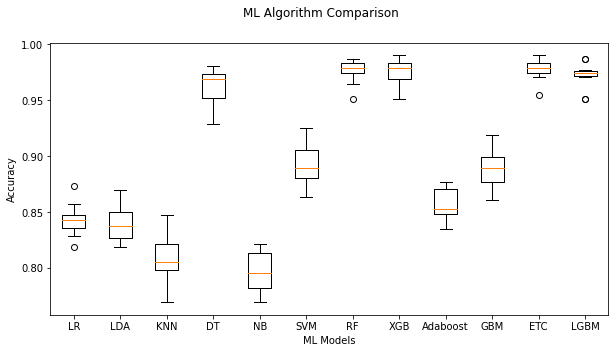

In [33]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(eval_metric='mlogloss')))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('LGBM', LGBMClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(10,5))
fig.suptitle('ML Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('ML Models')
ax.set_ylabel('Accuracy')
pyplot.show()

### Random Forest Model is chosen based on Cross Validation score while comparing different Models

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9909297052154195

### Hyperparameter Tunning Step

In [35]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_random = GridSearchCV(estimator = rf, param_grid = random_grid,scoring='accuracy', cv = 5, 
                               verbose=2,  n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 43.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=2)

In [36]:
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 200, max_depth= 25, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9924414210128496

### Performance Evaluation

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

Text(0.5, 24.0, 'Predicted Attrition')

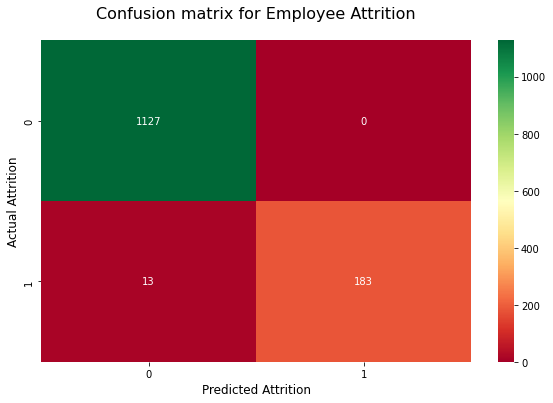

In [39]:
plt.figure(figsize=(8,5))
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Employee Attrition', y=1.05, fontdict={'fontsize': 16})
plt.ylabel('Actual Attrition', fontdict={'fontsize': 12})
plt.xlabel('Predicted Attrition', fontdict={'fontsize': 12})

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1127
           1       1.00      0.93      0.97       196

    accuracy                           0.99      1323
   macro avg       0.99      0.97      0.98      1323
weighted avg       0.99      0.99      0.99      1323



### Feature Importance

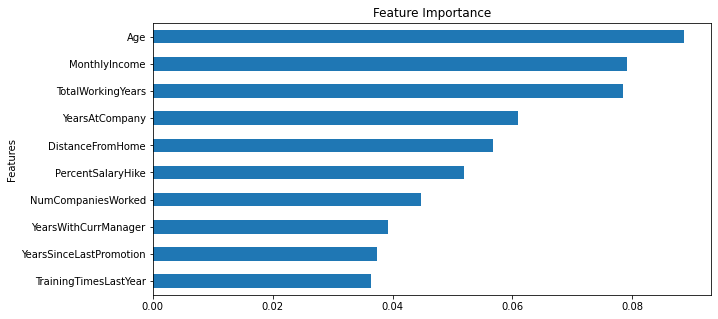

In [41]:
plt.figure(figsize=(10,5))
importances = model.feature_importances_
weights = pd.Series(importances, index=df.drop(['Attrition'],axis=1).columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')
plt.title('Feature Importance')
plt.ylabel('Features')
plt.show()

### Conclusions (Take away): 

Top 10 Reasons that led to Attrition are mentioned below with key action items-

- **Age**: Age shows good correlation with Attrition. Seen relatively hight attrition rate for younger age <= 33.  


- **Monthly Income**: Seen high attrition rate for Low Monthly Income employees.


- **TotalWorkingYears**: Seen high attrition rate for 7 years or less Total working year's employees.        


- **DistanceFromHome**: Seen high attrition rate for longer distance from Home (e.g. 10, 15 etc)      


- **YearsAtCompany**: Seen high attrition rate for low tenured employee. Max attrition are for 2 years or less till 10 years.


- **PercentSalaryHike**: Seen high attrition rate for low Percent hike till 15%.


- **YearsWithCurrManager**: Seen high attrition rate for low tenured employee with Current Manger. Max attrition are within 2 years stint.


- **NumCompaniesWorked**: Seen high attrition rate for those employees who have worked for minimum number of companies especially 0-1.


- **TrainingTimesLastYear**: Seen high attrition rate for 2-3 times training times last year.    


- **JobSatisfaction**: Seen high attrition rate for Job Satisfaction level 1.            

### ==========================  Thanks for Reading  ==========================  